# Ridge Regression
Performing ridge regression on the diabetes dataset in python.

In [1]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

## Reading and partitioning the data

In [3]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## Performing ridge regression
[linear_model.Ridge()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [6]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas) # 200 points from 10^-10 to 10^-2

### Performing ridge regression for multiple values of $\alpha$

In [8]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    coefs.append(ridge.coef_)

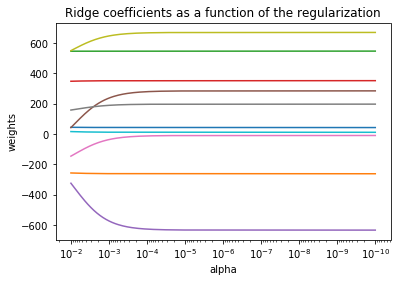

In [9]:
# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Cross Validation in Ridge Regression
[linear_model.RidgeCV()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [11]:
ridgeCV = linear_model.RidgeCV(alphas=alphas)
ridgeCV.fit(diabetes_X_train, diabetes_y_train)
print(ridgeCV.coef_)
print(ridgeCV.alpha_)                                   

[   1.91195872 -235.15535191  512.17801636  325.90250141 -563.97865975
  294.97009513   -8.10888661  153.70876158  647.83864795   78.08062036]
0.0039626886387
